In [1]:
from models.lineal_regresion import model_lineal_regresion as rg
from src.config import load_features, load_balanced_data, load_validation_data, load_train_data
from models.ramdom_forest import model_ramdom_forest as rf
from models.lightgbm import model_lgbmregressor as lgbm
from models.m_xgboost import model_xgboost as xgb
#from models.mrr import model_rnn as rnn
import metric_visualization as metric


In [2]:
feature_set = load_features("medium")

train = load_train_data(feature_set)

#validation = load_validation_data(feature_set, train)

In [3]:
for column in train.columns:
    print(column)

era
target
feature_abating_unadaptable_weakfish
feature_ablest_mauritanian_elding
feature_acclimatisable_unfeigned_maghreb
feature_accommodable_crinite_cleft
feature_accretive_sorrier_skedaddle
feature_acetose_periotic_coronation
feature_adam_incantational_winemaker
feature_additive_untrustworthy_hierologist
feature_adsorbed_blizzardy_burlesque
feature_affettuoso_taxidermic_greg
feature_afoul_valvate_faery
feature_agaze_lancinate_zohar
feature_aged_phylacterical_pusey
feature_agee_sold_microhabitat
feature_agnatic_coelanaglyphic_rooty
feature_agricultural_uranic_ankerite
feature_agrobiological_divalent_fleetingly
feature_aguish_commissioned_tessitura
feature_alcibiadean_lumpier_origan
feature_allegro_thirdstream_cranmer
feature_altimetrical_muddled_symbolism
feature_altimetrical_shaping_cocoa
feature_amoroso_wimpish_maturing
feature_ane_unprompted_columbary
feature_angevin_fitful_sultan
feature_anglophobic_unformed_maneuverer
feature_annihilative_yoruban_wile
feature_anopheline_confect

# Regresion lineal

In [4]:
model = rg(train, feature_set, "Regresion_lineal", False)

Modelo de Regresion_lineal cargado desde 'Regresion_lineal.pkl'.


Mean Absolute Error (MAE): 0.16120787271972098
Mean Squared Error (MSE): 0.05046349726207826


<Figure size 800x400 with 0 Axes>

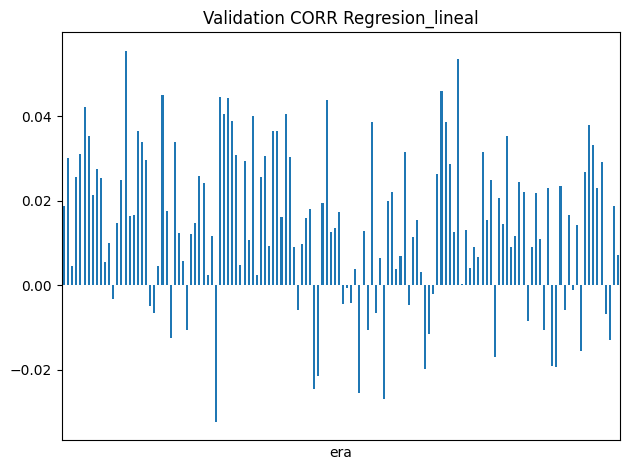

<Figure size 800x400 with 0 Axes>

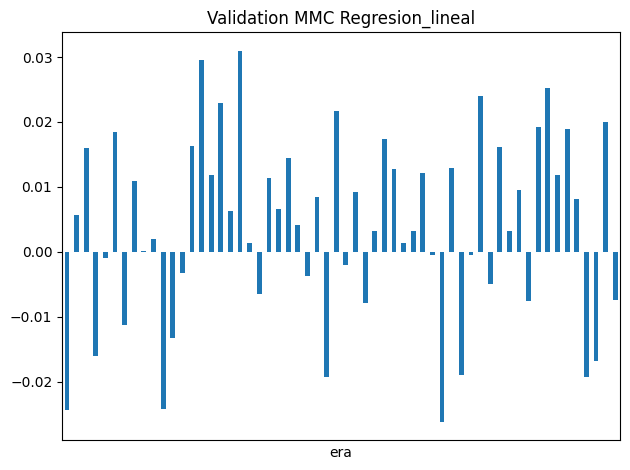

<Figure size 800x400 with 0 Axes>

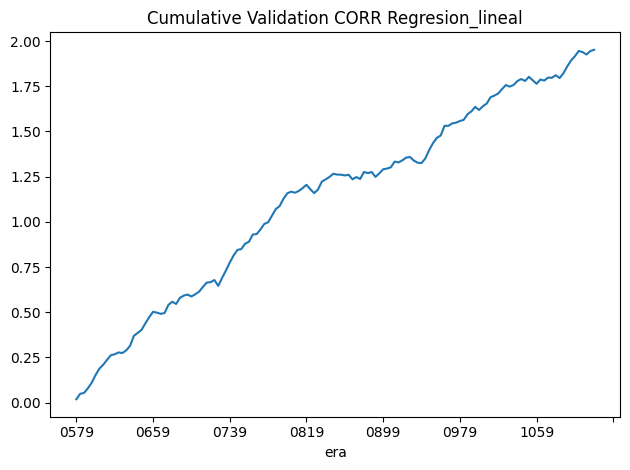

<Figure size 800x400 with 0 Axes>

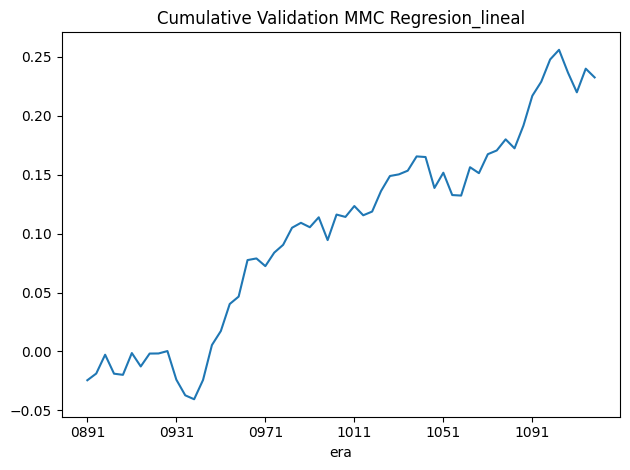

In [6]:
import metric_visualization as metric
validation = load_validation_data(feature_set, train)
metric.extract_metrics(validation, model, feature_set, "Regresion_lineal", "graficos_modelos_numerai")
del validation

# Ramdom Forest

In [10]:
param_distributions = {
    'n_estimators': [10,20,50],  # Número de árboles en el bosque
    'max_depth': [10,20, 100],  # Profundidad máxima de los árboles
    'min_samples_split': [2,5,10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [2,5],  # Número mínimo de muestras requeridas en cada hoja del árbol
    #'max_features': ['auto', 'sqrt', 'log2']  # Número máximo de características a considerar en cada división
}

model = rf(param_distributions, train, feature_set, "Random_forest", True)
print("Extrayendo métricas")
#metric.extract_metrics(validation, model, feature_set, "Random_forest", "graficos_modelos_numerai")

Comienza el entrenamiento del modelo
Model
Fitting 2 folds for each of 1 candidates, totalling 2 fits


KeyboardInterrupt: 

# LightGBM

Modelo de LGBM cargado desde 'LGBM.pkl'.
Mean Absolute Error (MAE): 0.1586722501763727
Mean Squared Error (MSE): 0.05010336925859791


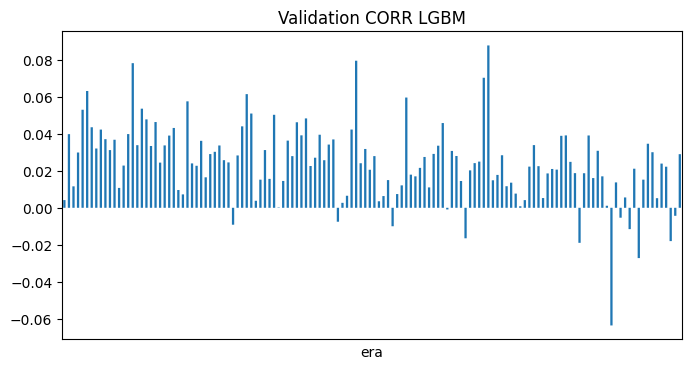

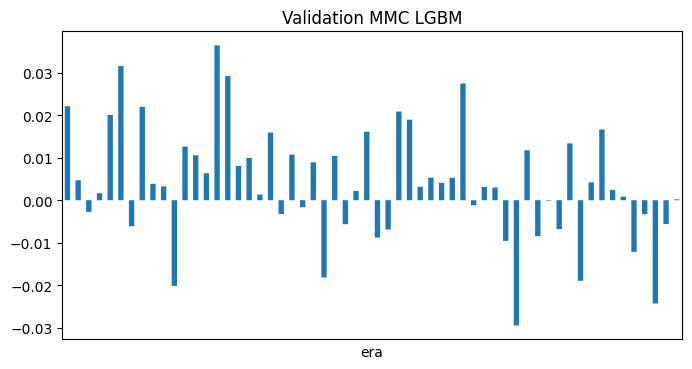

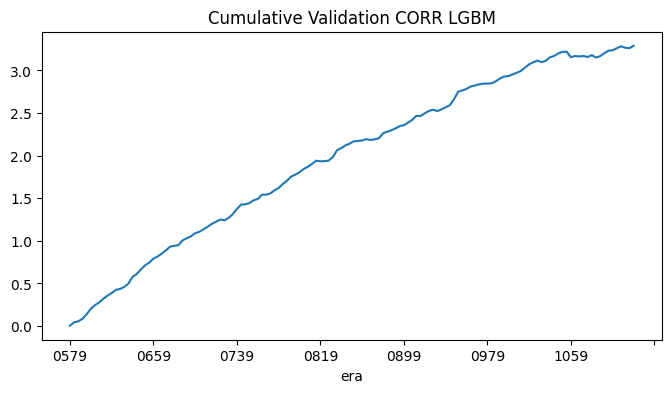

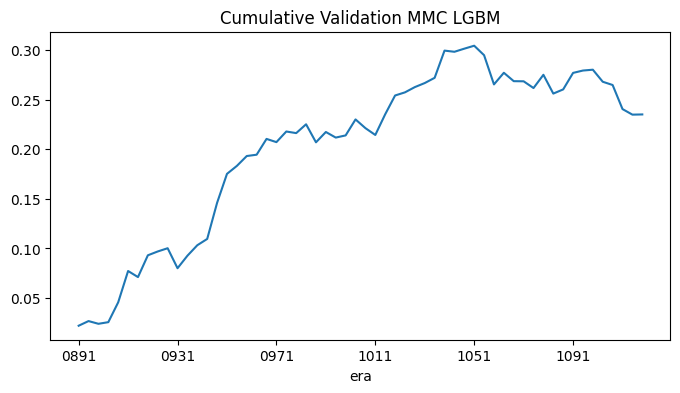

In [6]:
model = lgbm(train, feature_set, "LGBM", False)
metric.extract_metrics(validation, model, feature_set, "LGBM")

# XGBoost

In [3]:


params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 100,  # Reducción de profundidad
    'n_estimators': 500,  # Reducción del número de árboles*
    'tree_method': 'hist',
    'verbosity': 1,
    'colsample_bylevel': 0.9,
    'device' : "cuda"
}  
model = xgb(params, train, feature_set, "XGBoost", True)

Comienza el entrenamiento del modelo
La carpeta "pesos_modelos" ya existe.
Modelo de regresión lineal guardado en 'linear_regression_model.pkl'.


Mean Absolute Error (MAE): 0.17175601422786713
Mean Squared Error (MSE): 0.052995193749666214


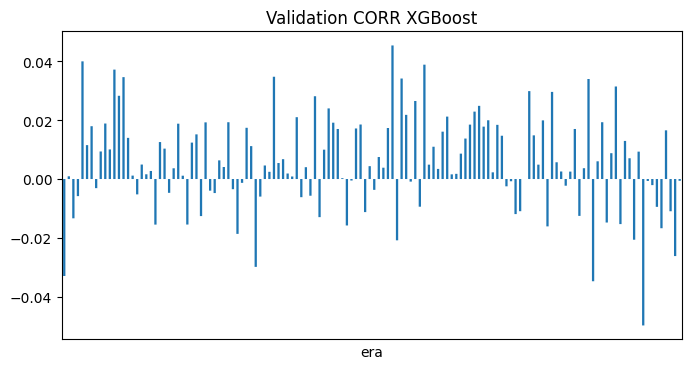

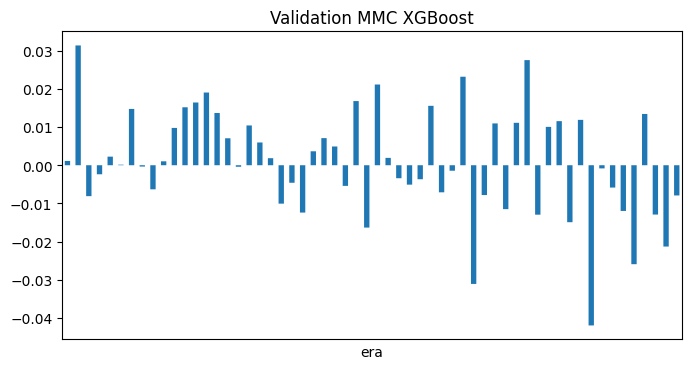

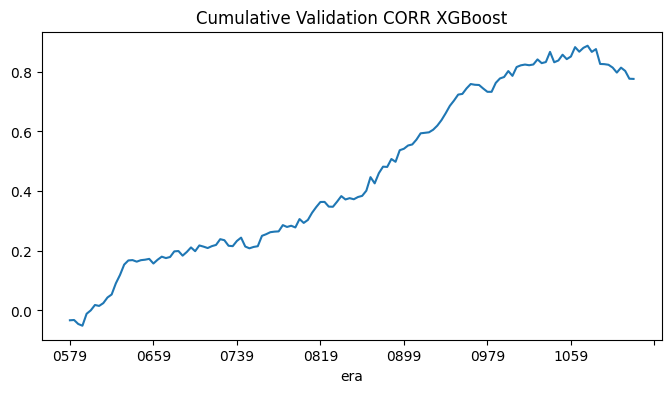

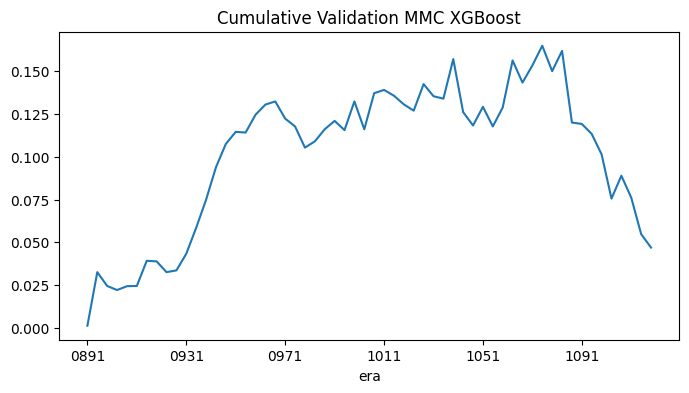

In [5]:
metric.extract_metrics(validation, model, feature_set, "XGBoost")